## Exercise 1: Decisive Distributions

### Import Dependencies

In [2]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [6]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_api_secret_key = os.getenv("ALPACA_API_SECRET_KEY")

print(type(alpaca_api_key))
print(type(alpaca_api_secret_key))

api = tradeapi.REST(alpaca_api_key, alpaca_api_secret_key, api_version="V2")

<class 'str'>
<class 'str'>


### Read in stock data using Alpaca API

In [21]:
tickers = ['SPY', 'LUV', 'DIS', 'AAPL', 'SBUX', 'WORK']

start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-06-04", tz="America/New_York").isoformat()

stock_data = api.get_barset(tickers, "day", start=start_date, end=end_date, limit=5).df
stock_data.head()

AAPL                                       DIS  \
                              open    high     low   close    volume    open   
time                                                                           
2020-05-29 00:00:00-04:00  319.250  321.15  316.47  318.76  56248101  116.19   
2020-06-01 00:00:00-04:00  317.750  322.35  317.21  321.76  37704502  117.26   
2020-06-02 00:00:00-04:00  320.745  323.44  318.93  323.42  37968664  119.00   
2020-06-03 00:00:00-04:00  324.660  326.10  322.30  325.09  45506089  119.99   
2020-06-04 00:00:00-04:00  324.390  325.62  320.78  322.25  38930216  121.95   

                                                                 ...     SPY  \
                               high       low   close    volume  ...    open   
time                                                             ...           
2020-05-29 00:00:00-04:00  117.7500  114.1200  117.26  15610366  ...  302.46   
2020-06-01 00:00:00-04:00  119.6498  116.9300  118.79  10142973  ...  303.62   
2020-06-02 00:00:00-04:00  119.8500  117.8300  118.75   9662211  ...  306.55   
2020-06-03 00:00:00-04:00  122.4500  119.3201  122.16  11670886  ...  310.24   
2020-06-04 00:00:00-04:00  124.5000  121.8500  123.69  13136485  ...  311.11   

                                                                  WORK         \
                              high     low     close     volume   open   high   
time                                                                            
2020-05-29 00:00:00-04:00  304.960  299.47  304.1600  101356845  33.74  35.11   
2020-06-01 00:00:00-04:00  306.205  303.06  305.5800   46186733  35.58  37.34   
2020-06-02 00:00:00-04:00  308.130  305.10  308.1300   66042497  38.77  38.90   
2020-06-03 00:00:00-04:00  313.220  309.94  312.2117   79223813  38.44  39.99   
2020-06-04 00:00:00-04:00  313.000  309.08  311.3100   68304792  40.00  40.07   

                                                   
                             low  close    volume  
time                                               
2020-05-29 00:00:00-04:00  33.27  35.08  18548229  
2020-06-01 00:00:00-04:00  35.23  37.18  17899594  
2020-06-02 00:00:00-04:00  36.18  38.34  35713611  
2020-06-03 00:00:00-04:00  38.00  39.86  23688267  
2020-06-04 00:00:00-04:00  37.67  37.94  36764852  

[5 rows x 30 columns]

### Create a new DataFrame and store the closing prices of each stock.

In [24]:
# Create and empty DataFrame for closing prices
close_price_df = pd.DataFrame()
close_df = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    close_df[ticker] = stock_data[ticker]['close']

# close_price_df['SPY'] = stock_data['SPY']['close']
# close_price_df['LUV'] = stock_data['LUV']['close']
# close_price_df['DIS'] = stock_data['DIS']['close']
# close_price_df['AAPL'] = stock_data['AAPL']['close']
# close_price_df['SBUX'] = stock_data['SBUX']['close']
# close_price_df['WORK'] = stock_data['WORK']['close']

# Drop the time component of the date
close_df.index = close_price_df.index.date

# Display sample data
close_df.head()

AttributeError: 'Index' object has no attribute 'date'

### Calculate the daily returns for each stock using the `pct_change()` function

In [19]:
# Compute daily returns
daily_returns = close_price_df.pct_change().dropna()

# Display sample data
daily_returns

,SPY,LUV,DIS,AAPL,SBUX,WORK
2020-06-01,0.004669,0.047337,0.013048,0.009411,0.006036,0.059863
2020-06-02,0.008345,0.025275,-0.000337,0.005159,-0.007021,0.031200
2020-06-03,0.013247,0.056265,0.028716,0.005164,0.023139,0.039645
2020-06-04,-0.002888,0.051483,0.012525,-0.008736,-0.010680,-0.048169


### Plot Distributions

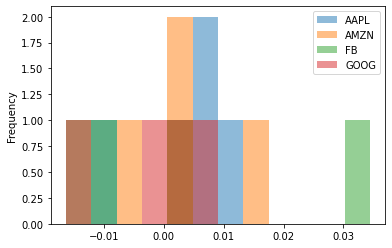

In [10]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
axes = daily_returns.plot.hist(bins=12, alpha=0.5)

<AxesSubplot:ylabel='Density'>

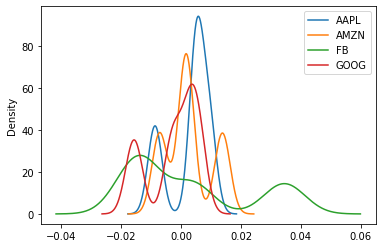

In [11]:
# Visualize the distribution of daily returns across all stocks using a density plot
daily_returns.plot.kde(bw_method=0.3)